In [37]:
import pandas as pd
import numpy as np
import vaex as vx
import matplotlib.pyplot as plt
import seaborn as sns
import time
from multiprocessing import Process
import gc
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.sans-serif'] =['SimHei']
plt.rcParams['axes.unicode_minus'] = False
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option("display.max_colwidth", 9999)
vx.settings.display.max_columns = 200
vx.settings.display.max_rows = 100
vx.settings.max_colwidth=60000
pd.set_option('display.float_format',lambda x : '%.4f' % x)
np.set_printoptions(suppress=True) #
pd.options.display.float_format = '{:.4f}'.format
%matplotlib inline

In [ ]:
'''
sns.distplot() histograms, mass estimation plots, kernel density estimation plots; You can also plot a composite plot of a histogram and a kernel density estimation plot by setting the default to be a composite plot 直方图，质量估计图，核密度估计图; 也可以绘制直方图和核密度估计图的合成图 通过设置默认情况下，是绘制合成图
hist=True,plot the histogram, False does not 绘制直方图 ，False 不绘制
kde=True，plot the kernel density estimation, False does not 绘制核密度估计图，False 不绘制

sns.distplot(a,bins=None,hist=True,kde=True,rug=False,fit=None,hist_kws=None,kde_kws=None,fit_kws=None,color=None,
vertical=False,norm_hist=False,axlabel=None,label=None,ax=None)
a:Series , arrary or list

bins:matplotlib hist() or None; None use Freedman-Diaconis
    bin size: [2∗IQR(X(:))∗numel(X)(−1/4),2∗IQR(Y(:))∗numel(Y)(−1/4)][2∗IQR(X(:))∗numel(X)(−1/4),2∗IQR(Y(:))∗numel(Y)(−1/4)] 
       IQR:quartile
hist:bool  histograms
kde:bool plot the kernel density estimation
rug:bool  rugplot()
{hist,kde,rug,fit} _kws: 
color: matplotlib color
vertical:bool  True=y


def displot(
    data=None, *,
    # Vector variables
    x=None, y=None, hue=None, row=None, col=None, weights=None,
    # Other plot parameters
    kind="hist", rug=False, rug_kws=None, log_scale=None, legend=True,
    # Hue-mapping parameters
    palette=None, hue_order=None, hue_norm=None, color=None,
    # Faceting parameters
    col_wrap=None, row_order=None, col_order=None,
    height=5, aspect=1, facet_kws=None,
    **kwargs,
):
'''

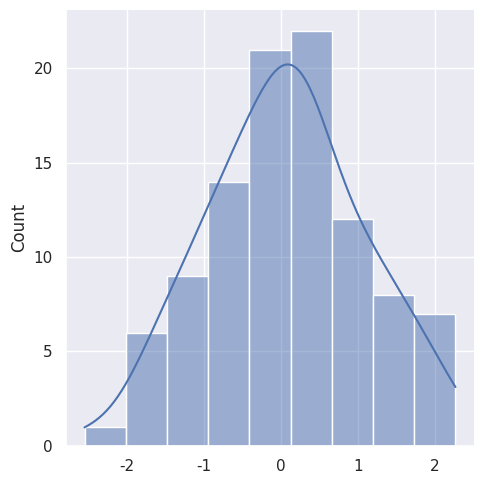

In [4]:
sns.set()
np.random.seed(0)
x = np.random.randn(100)
#1
sns.displot(x,kde=True,kind='hist',)
plt.show()

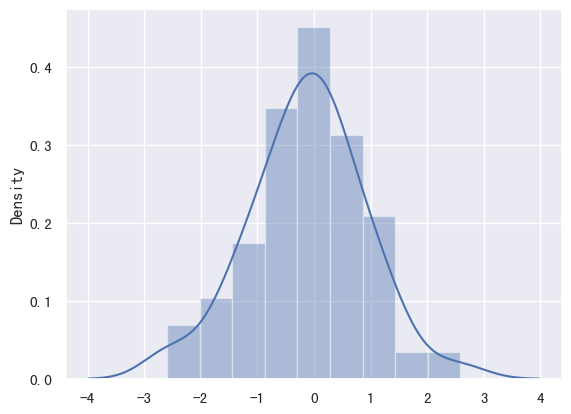

In [44]:
#2.name='x variable'
plt.close('all')
x = pd.Series(x,name='x Variable')
sns.distplot(x=x)  # or  sns.histplot(x)
plt.show()

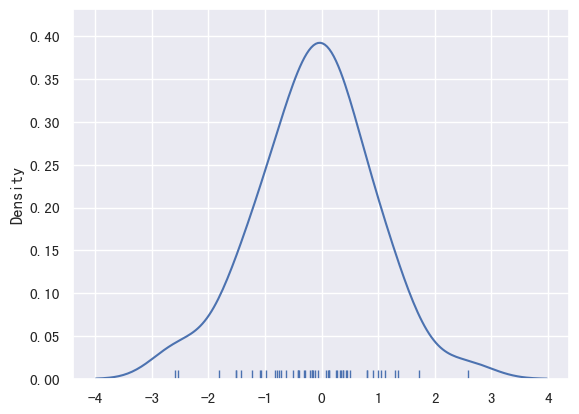

In [42]:
#3
plt.close('all')
sns.distplot(x,rug=True,hist=False) # or kdeplot
plt.show()

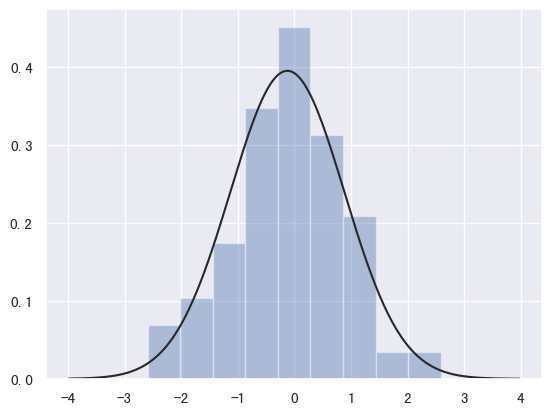

In [41]:
#4.
from scipy.stats import norm
plt.close('all')
sns.distplot(x,fit=norm,kde=False)
plt.show()

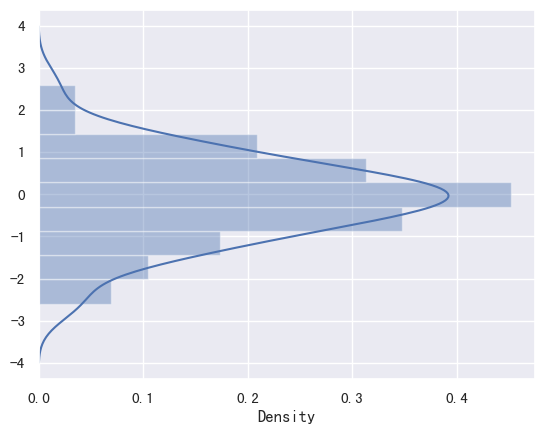

In [40]:
#5
plt.close('all')
sns.distplot(x,vertical=True)
plt.show()

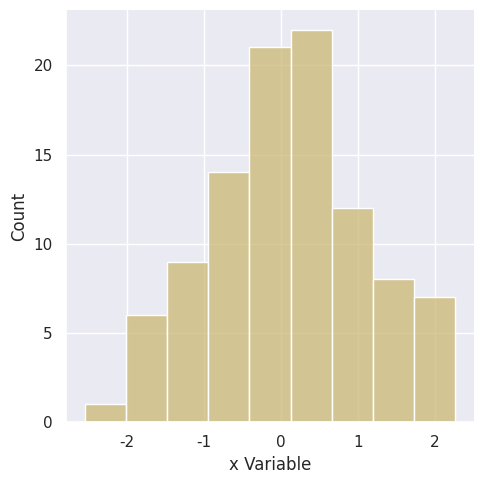

In [17]:
#6
plt.close('all')
sns.set()
sns.set_color_codes()
sns.displot(x,color='y')
plt.show()

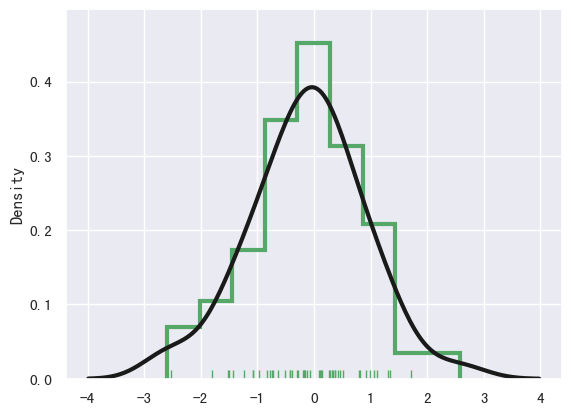

In [39]:
#7
plt.close('all')
sns.distplot(x,rug=True,rug_kws={'color':'g'},
            kde_kws={'color':'k','lw':3,'label':'KDE'},
            hist_kws={'histtype':'step','linewidth':3,'alpha':1,'color':'g'})
plt.show()

In [ ]:
'''
sns.kdeplot()
sns.kdeplot(data,data2=None,shade=False,vertical=False,kernel='gau',bw='scott',gridsize=100,cut=3,clip=None,
legend=True,cumulative=False,shade_lowest=True,cbar=False,cbar_ax=None,cbar_kws=None,ax=None,**kwargs)
shade: 阴影 bool  =True在曲线下添加阴影
cbar：bool =True 绘制双变量kde图，并添加颜色条
'''

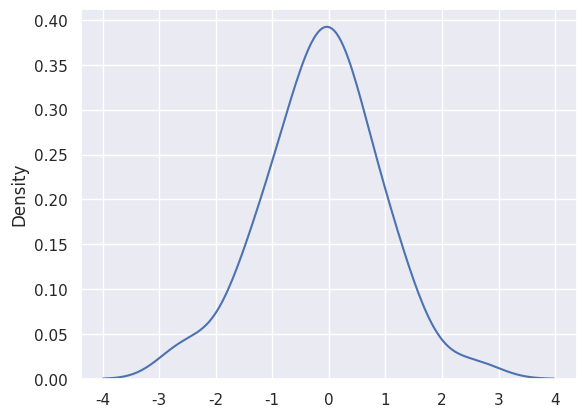

In [6]:
# 1. plot
plt.close('all')
sns.set(color_codes=True)
np.random.seed(10)
mean,cov = [0,2],[(1,.5),(.5,1)]
x,y = np.random.multivariate_normal(mean,cov,size=50).T
sns.kdeplot(x)
plt.show()

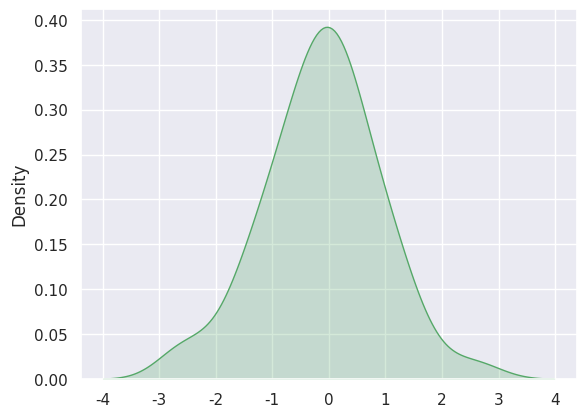

In [9]:
#2.color='g'
plt.close('all')
sns.set(color_codes=True)
np.random.seed(10)
sns.kdeplot(x,fill=True,color='g') # shade=True,
plt.show()

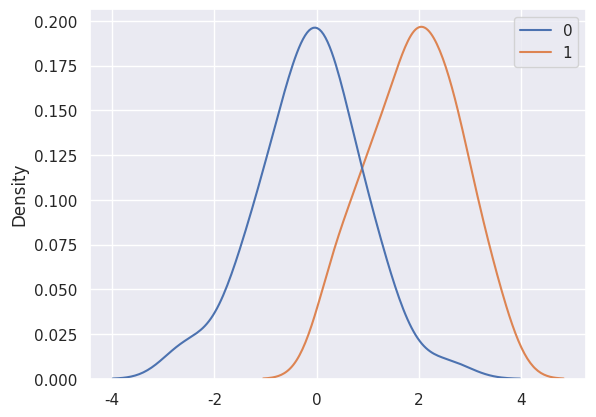

In [14]:
#3 kdeplot(x,y)
plt.close('all')
sns.set(color_codes=True)
np.random.seed(10)
mean,cov = [0,2],[(1,.5),(.5,1)]
x,y = np.random.multivariate_normal(mean,cov,size=50).T
sns.kdeplot([x,y])
plt.show()

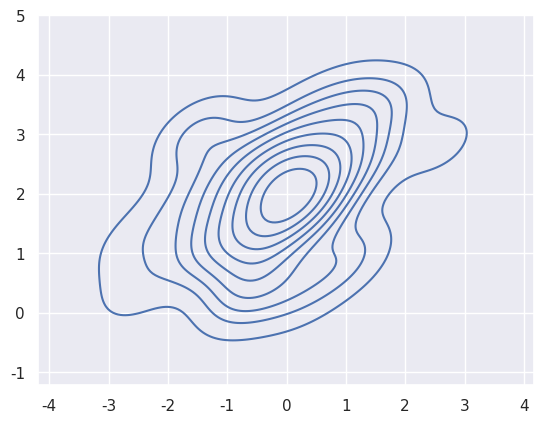

In [16]:
#4 kdeplot(x,y)
plt.close('all')
sns.set(color_codes=True)
np.random.seed(10)
mean,cov = [0,2],[(1,.5),(.5,1)]
x,y = np.random.multivariate_normal(mean,cov,size=50).T
sns.kdeplot(x=x,y=y)
plt.show()

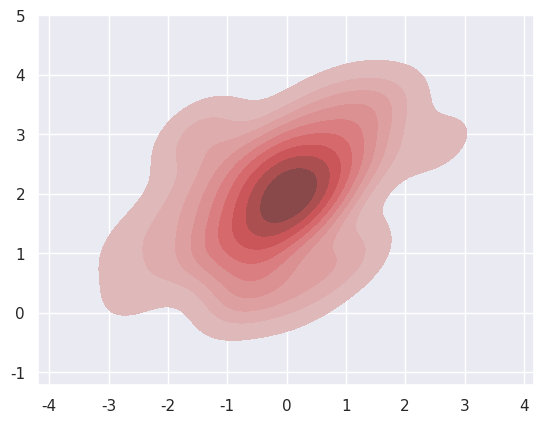

In [17]:
#5 kdeplot(x,y)
plt.close('all')
sns.set(color_codes=True)
np.random.seed(10)
mean,cov = [0,2],[(1,.5),(.5,1)]
x,y = np.random.multivariate_normal(mean,cov,size=50).T
sns.kdeplot(x=x,y=y,fill=True,color='r')
plt.show()

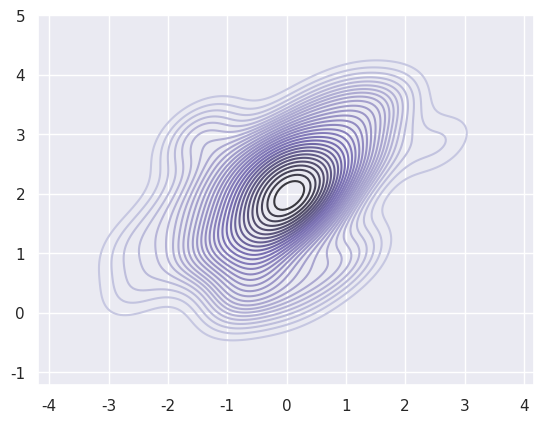

In [18]:
#6 kdeplot(x,y,n_levels=30)
plt.close('all')
sns.set(color_codes=True)
np.random.seed(10)
mean,cov = [0,2],[(1,.5),(.5,1)]
x,y = np.random.multivariate_normal(mean,cov,size=50).T
sns.kdeplot(x=x,y=y,n_levels=30,cmap='Purples_d')
plt.show()

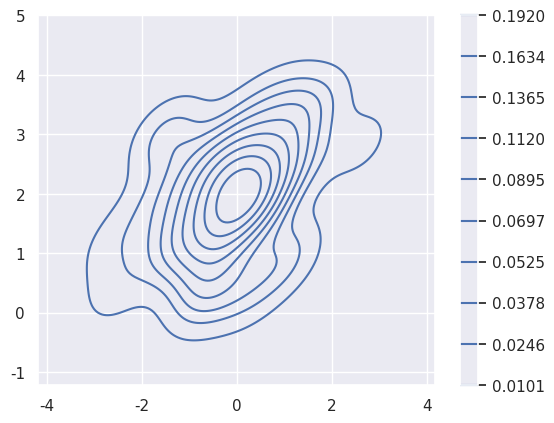

In [19]:
#7 kdeplot(x,y,cbar=True)
plt.close('all')
sns.set(color_codes=True)
np.random.seed(10)
mean,cov = [0,2],[(1,.5),(.5,1)]
x,y = np.random.multivariate_normal(mean,cov,size=50).T
sns.kdeplot(x=x,y=y,cbar=True)
plt.show()

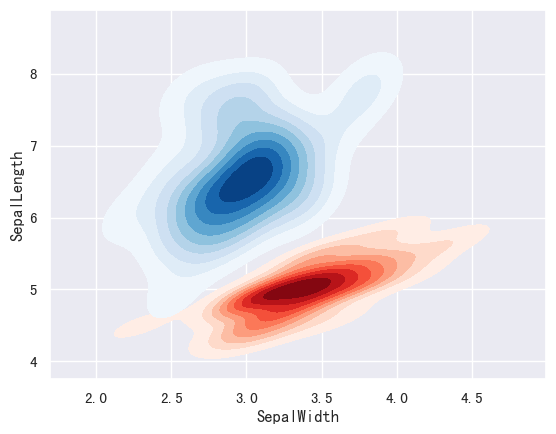

In [38]:
#8 kdeplot(x,y)
plt.close('all')
iris = pd.read_csv('../data/iris.csv')
setosa = iris.loc[iris['Name'] == 'Iris-setosa']
virginica = iris.loc[iris['Name'] == 'Iris-virginica']
sns.kdeplot(x=setosa.SepalWidth,y=setosa.SepalLength,cmap='Reds',fill=True,shade_lowest=False) # shade=True
sns.kdeplot(x=virginica.SepalWidth,y=virginica.SepalLength,cmap='Blues',fill=True,shade_lowest=False)
plt.show()